In [1]:
import pandas as pd
import numpy as np

import popsims
from popsims.galaxy import Disk
from astropy.coordinates import SkyCoord
import astropy.units as u

import warnings

warnings.filterwarnings("ignore")

from popsims.galaxy import Disk, Halo, MWBulge
from popsims.plot_style import  plot_style

plot_style()
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
disk= Disk(H=300, L=2600)
tdisk=Disk(H=900, L=3600)
halo= Halo()
model= disk+0.12*tdisk+(1/400)*halo

In [5]:
b=MWBulge(rot=-20)

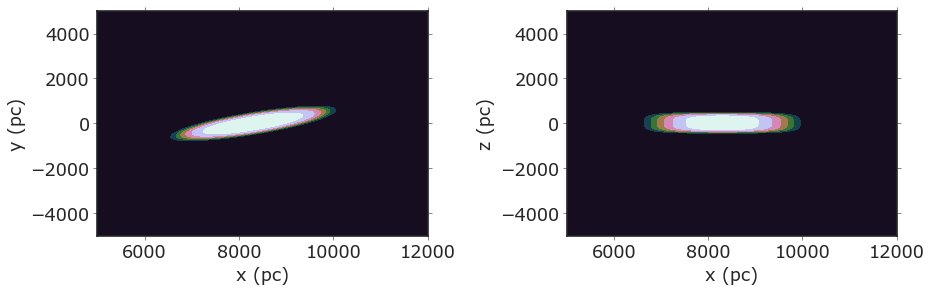

In [7]:
ax=b.plot_countours(npoints=200,
    cmap='cubehelix',  xmin=5000, xmax=12000)
#ax[0].set(')
plt.tight_layout()

In [8]:
ax=model.plot_countours(npoints=200,
    cmap='cubehelix',  xmin=5000, xmax=12000)

TypeError: GalacticComponent.__mul__.<locals>.<lambda>() takes 2 positional arguments but 3 were given